Markus Schröder, Computational modeling in python, SoSe2022

# Basic input and output

Variables can directly be printed out using the print() statement. Format() provides an easy way to format the output.

In [1]:
# a string variable
myval = "Hello world"
print(myval)

Hello world


In [2]:
# print two or more things
print('I just meant to say',myval)

# integer variable 
myval2 = 2

# floating point variable
myval3 = 13.9

print(myval,myval2,myval3)

print('First variable:',myval,'second variable:',myval2,'and third variable:',myval3)

# using formatted output (note the f before the '')
# these are called formatted string literals or “f-strings”. 
print(f'The value of myval3 is approximately (fixed No. digits) {myval3:.3f}.')

# one can also call the format function of the string class:
print('The value of myval3 is approximately (fixed No. digits) {:.3f}.'.format(myval3))
print('The value of myval3 is approximately (scientific notation) {:.3e}.'.format(myval3))
print('first variable {}, second variable (padded) {:03d}, and third variable {:3.8f}'.format(myval2,myval2,myval3))

I just meant to say Hello world
Hello world 2 13.9
First variable: Hello world second variable: 2 and third variable: 13.9
The value of myval3 is approximately (fixed No. digits) 13.900.
The value of myval3 is approximately (fixed No. digits) 13.900.
The value of myval3 is approximately (scientific notation) 1.390e+01.
first variable 2, second variable (padded) 002, and third variable 13.90000000


For more details on formatting see for instance https://docs.python.org/3/tutorial/inputoutput.html

Strings can also be written out to a file that will be placed relative to the directory where jupyter is running. Please note the slightly different syntax, here the variables and strings are first concatenated into a new string that is then written to the file.

In [3]:
# open the file with name myout; it is referred to as "f" but you can choose any name you want.

f = open('myout', 'w') 

# 'r' for read-only (default)
# 'w' for write-only (an existing file with same name will be overwritten)
# 'a' for appending any output to the end of an existing file
# 'r+' for both reading and writing

f.write(myval+'\n')

# the \n signifies that a new line will be started. 
# Unlike print(), write() does not append a newline by default

f.write('I just meant to say ' + myval + '\n')

# myval is already a string so it can be combined with other 
# strings without the need of additional formatting.
# Please note the extra space in the first string and the +:
# print() takes multiple arguments and does some additional formatting.
# write() takes exactly one argument, a string, so we must take care of the formatting. 

# myval, myval2 and myval3 first need to be converted to strings. We can also do it like this:

f.write(str(myval)+str(myval2)+str(myval3)+'\n')

# or:

mystring = 'First variable '+str(myval)+' second variable '+str(myval2)+' and third variable '+str(myval3)+'\n'

f.write(mystring)


# For formatted output, this is not a problem.

f.write(f'The value of myval3 is approximately (fixed No. digits) {myval3:.3f}.\n')
f.write('The value of myval3 is approximately {:.3f}.\n'.format(myval3))
f.write('The value of myval3 is approximately {:.3e}.\n'.format(myval3))
f.write('First variable {}, second variable {:03d}, and third variable {:3.8f}\n'.format(myval,myval2,myval3))

# don't forget to close the file.
f.close()



Variables can also be read in from a file. For this, please place the file "data.dat" in your directory.

The file contains the following lines

|||
| - | - |
| 2.5     | 0.097  |
| 5.0     | 0.195  |
| 7.5     | 0.289  |
| 10.0    | 0.387  |
| 15.0    | 0.581  |
| 20.0    | 0.775  |
| 30.0    | 0.966  |

Files can be read like this:

In [4]:
f = open('data.dat', 'r') 
complete = f.read()
print('Read the complete file:')
print(complete)
print(type(complete)) # complete is a single string
f.close()

Read the complete file:
2.5   0.097
5.0   0.195
7.5   0.289
10.0  0.387
15.0  0.581
20.0  0.775
30.0  0.966

<class 'str'>


In [5]:
f = open('data.dat', 'r') 
lineonly = f.readline()
print('Read only one line:')
print(lineonly)


# go back to the beginning of the file
f.seek(0)

# Files are iterable, so we can actually iterate through the lines in a file:
for line in f:
    print('Accessing line by line:')
    print(line.strip())
    # strip removes the trailing whitespace and newline; try
    # print(line)
    # to compare
f.close()

Read only one line:
2.5   0.097

Accessing line by line:
2.5   0.097
Accessing line by line:
5.0   0.195
Accessing line by line:
7.5   0.289
Accessing line by line:
10.0  0.387
Accessing line by line:
15.0  0.581
Accessing line by line:
20.0  0.775
Accessing line by line:
30.0  0.966


There is also a more pythonic way to read a file: This ensures that the file is properly closed in the end and no need for the close() statement.

In [6]:
with open('data.dat') as f:
    read_data = f.read()
    
print(read_data)

2.5   0.097
5.0   0.195
7.5   0.289
10.0  0.387
15.0  0.581
20.0  0.775
30.0  0.966



This provides a very compact way of accessing a file.

# Linear regression

Imagine you know only values of a function at specific points, and you would like to know to what extent these follow a linear behaviour, and what the linear coefficients are.

## A simple example

In linear regression, the functional form that describes the data is assumed to be linear of the type $y=ax+b$.

We will use least-squares linear regression: The sum of the squares of the vertical deviations is given by $R^2$ (for a set of n data points):
\begin{align}
R^2=\sum_{i=1}^n [y_i-(ax_i+b)]^2 = R^2(a,b)
\label{eq:R2} \tag{1}
\end{align}
This value is minimized so that the condition reads
\begin{align}
\frac{\partial R^2}{\partial a}&=0\\ 
\frac{\partial R^2}{\partial b}&=0
\end{align}
resulting in 
\begin{align}
\frac{\partial R^2}{\partial a}&=-2 \sum_{i=1}^n [y_i-(ax_i+b)] x_i\\
\frac{\partial R^2}{\partial b}&=-2 \sum_{i=1}^n [y_i-(ax_i+b)] 
\end{align}
or, reformulated

\begin{align}
a \sum_{i=1}^n x_i^2 + b \sum_{i=1}^n x_i &= \sum_{i=1}^n x_i y_i\\
a \sum_{i=1}^n x_i + nb	&= \sum_{i=1}^n y_i	
\end{align}


This can be expressed in matrix form
\begin{align}
\begin{pmatrix}
 \sum_{i=1}^n x_i^2 &  \sum_{i=1}^n x_i\\
\sum_{i=1}^n x_i & n \\
\end{pmatrix}
\begin{pmatrix}
a \\
b
\end{pmatrix} =
\begin{pmatrix}
\sum_{i=1}^n x_i y_i	\\
\sum_{i=1}^n y_i
\end{pmatrix}
 \end{align}
and solved for $a$ and $b$.


The data file "data.out" contains value pairs with the left column (x-values) corresponding to sample volume and the right column (y-values) detailing the measured extinction (light absorption) for each sample volume.


In [7]:
# initialize myx and myy as empty lists, can be added to!

myx=[]
myy=[]

with open('data.dat') as f:
    for line in f:

        # every new item for x is converted to float and appended to the array myx
        # the split() function retuns a list of words of the line.
        # append() takes an item and appends it at the end of the list. 
        myx.append(float(line.split()[0])) #splitting line into separate words
        # print(myx)
        
        # every new item for y is converted to float and appended to the array myy
        myy.append(float(line.split()[1]))

# in the end we obtain one list filled with the x values and one with the y values
print('x-values:',myx)
print('y-values:',myy,'\n')

# the values are now stored in two lists, myx and myy. 
# the elements in the list can be accessed as such:

print('first list element has the index zero', myx[0])
print('second list element has the index one', myx[1],'\n')

print('first to third element can be accesses as such', myx[0:3], 'or as such',myx[:3],'\n')
print('the last element is easiest like this', myx[-1],'\n')
print('if I want to know how many elements I have in my list:',len(myx),'\n')

# and we can also loop over them:
# range() returns an iterable of integers (like a list: [0,1,2,...])
for i in range(len(myx)):
    something = myx[i]
    print('myx',i,':',something)
    
# or like this:
for i in myx:
    something = i
    print('myx:',something)

# both loops achieve the same in this case

x-values: [2.5, 5.0, 7.5, 10.0, 15.0, 20.0, 30.0]
y-values: [0.097, 0.195, 0.289, 0.387, 0.581, 0.775, 0.966] 

first list element has the index zero 2.5
second list element has the index one 5.0 

first to third element can be accesses as such [2.5, 5.0, 7.5] or as such [2.5, 5.0, 7.5] 

the last element is easiest like this 30.0 

if I want to know how many elements I have in my list: 7 

myx 0 : 2.5
myx 1 : 5.0
myx 2 : 7.5
myx 3 : 10.0
myx 4 : 15.0
myx 5 : 20.0
myx 6 : 30.0
myx: 2.5
myx: 5.0
myx: 7.5
myx: 10.0
myx: 15.0
myx: 20.0
myx: 30.0


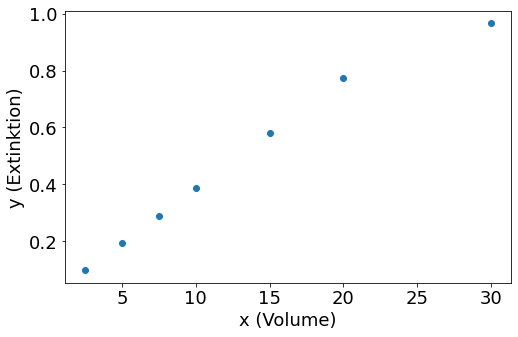

In [8]:
# Now we can plot the values
# using matplotlib

# first import the library
import matplotlib.pyplot as plt

# font size
mf = 18

# create figures and axis
fig, ax = plt.subplots(figsize=(8,5))

# subplots returns a tuple that is unpacked into fig and ax here -
# ax is the object controlling the axes formatting,
# and fig is useful for global figure attributes, for example, 
# if you want to save the figure into a file
# scatter(): plot (without a line)

ax.scatter(myx,myy)
ax.set_xlabel('x (Volume)', fontsize=mf)
ax.set_ylabel('y (Extinktion)', fontsize=mf)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# if you want, you can save the plot
# plt.savefig('data.pdf', dpi=300, bbox_inches='tight')

# display the plot - in jupyter not really required but it is cleaner
plt.show()

Now we can do the linear regression using the scipy library.

In [9]:
# import some elements from the scipy and numpy packages

from scipy import stats
from numpy import array, sqrt


# myx and myy are lists - and you cannot perform mathematical operations on lists
# they have to be converted to arrays first, for that we need the numpy library
# (stats.linregress(x,y) can also take lists)

x = array(myx)
y = array(myy)


# call the linear regression function on the data we loaded before
slope, intercept, r, p, std_err = stats.linregress(x,y)

print('Slope a {:.3f}, intercept b {:3f}, Pearsons correlation coefficient r {:3f};'.format(slope,intercept,r))
print('standard error of slope {:3f}'.format(std_err))


Slope a 0.033, intercept b 0.049807, Pearsons correlation coefficient r 0.989551;
standard error of slope 0.002130


What is  Pearsons correlation coefficient?

\begin{align}
r = \frac{\frac1{n}\sum_i x_i y_i - \left(\frac1{n}\sum_i x_i\right) \left(\frac1{n}\sum_i x_y\right)}{\sqrt{\frac1{n}\sum_i x_i^2 - \left(\frac1{n}\sum_i x_i\right)^2} \sqrt{\frac1{n}\sum_i y_i^2 - \left(\frac1{n}\sum_i y_i\right)^2} } = \frac{{\rm cov}(\vec{x},\vec{y})}{\sqrt{{\rm var}(\vec{x}) \cdot {\rm var}(\vec{y}) }  }
\end{align}

In [10]:
r = ((x*y).mean() - x.mean()*y.mean())/sqrt((x**2).mean()- x.mean()**2)/sqrt((y**2).mean()- y.mean()**2)

R2 = ((y-(slope*x + intercept))**2).sum()

print('check r {:3f}'.format(r))
print('check R^2 {:3f}'.format(R2))

check r 0.989551
check R^2 0.012594


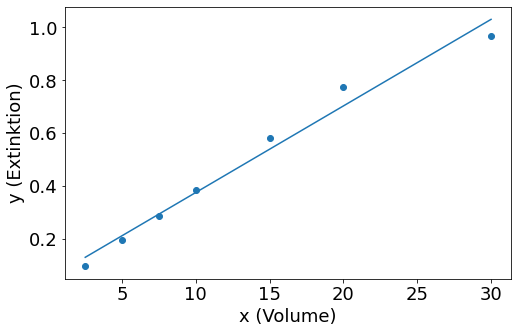

In [11]:
# Now we can plot the values together with the fit

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x,y,label='values')
ax.plot(x,slope*x+intercept,label='fit')

ax.set_xlabel('x (Volume)',fontsize=18)
ax.set_ylabel('y (Extinktion)',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('data_regression.pdf',dpi=300,bbox_inches='tight')
plt.show()

# Problem 2: Good fit

A linear behaviour of extinction vs. concentration (volume) signifies validity of the Lambert-Beer law. The Lambert-Beer law is only valid for dilute solutions, which explains the deviation of the large-volume data points from linear behaviour. 

Please carry out the linear regression using fewer points to obtain a better fit. How many points should be used for a good fit? What is the error in comparison to a fit using all data points?

In [ ]:
I = e * c * d

In [ ]:
#definition of good fit: r^2 >0.999

#for loop:
    #remove max point, since higher vol means higher deviation
    #check, if linear regression has r^2 > 0.999


In [29]:
from scipy import stats
from numpy import array, sqrt
import matplotlib.pyplot as plt

In [26]:
vol=[]
ext=[]

with open('data.dat') as f:
    for line in f:
        vol.append(float(line.split()[0]))
        ext.append(float(line.split()[1]))

for i in range(len(vol)):
    something = vol[i]
    print('vol',i,':',something)
    
# or like this:
for i in vol:
    something = i
    print('vol:',something)

vol 0 : 2.5
vol 1 : 5.0
vol 2 : 7.5
vol 3 : 10.0
vol 4 : 15.0
vol 5 : 20.0
vol 6 : 30.0
vol: 2.5
vol: 5.0
vol: 7.5
vol: 10.0
vol: 15.0
vol: 20.0
vol: 30.0


In [54]:
def get_r(vol, ext):
    for i,el in enumerate(range(len(vol))):
        if i!=0 & i<(len(vol)-2):
            x = array(vol[:-i])
            y = array(ext[:-i])
            slope, intercept, r, p, std_err = stats.linregress(x,y)
            print('Slope a {:.3f}, intercept b {:3f}, Pearsons correlation coefficient r {:3f};'.format(slope,intercept,r))
            #print('standard error of slope {:3f}'.format(std_err))
            graph(x, y)

In [55]:
def graph(x, y):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(x,y,label='values')
    ax.plot(x,slope*x+intercept,label='fit')

    ax.set_xlabel('x (Volume)',fontsize=18)
    ax.set_ylabel('y (Extinktion)',fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    #plt.savefig('data_regression.pdf',dpi=300,bbox_inches='tight')
    plt.show()

Slope a 0.039, intercept b 0.000039, Pearsons correlation coefficient r 0.999993;


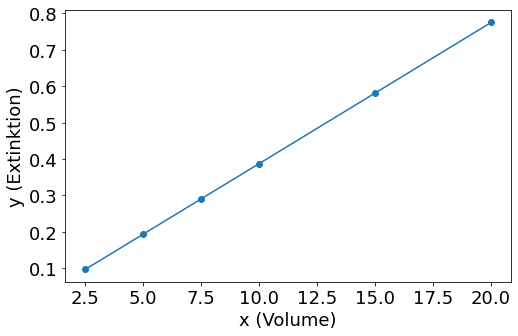

Slope a 0.039, intercept b 0.000351, Pearsons correlation coefficient r 0.999986;


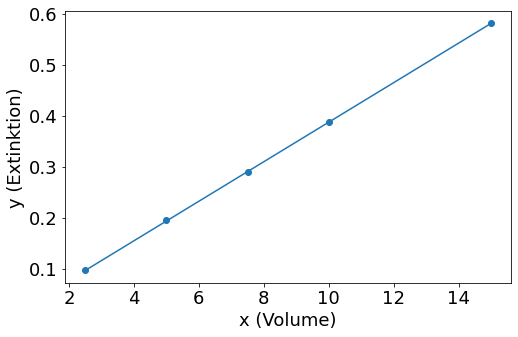

Slope a 0.039, intercept b 0.001000, Pearsons correlation coefficient r 0.999966;


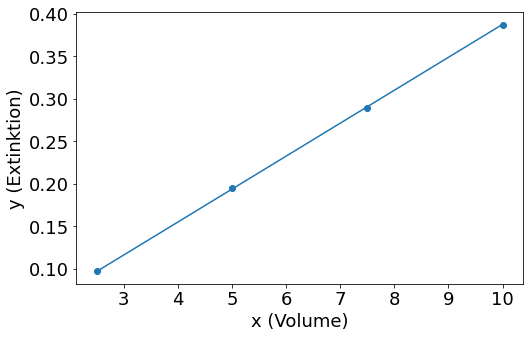

Slope a 0.038, intercept b 0.001667, Pearsons correlation coefficient r 0.999928;


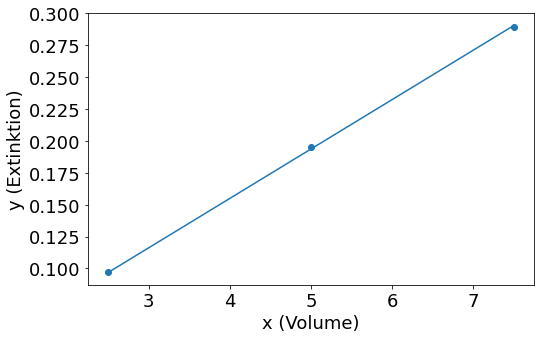

Slope a 0.039, intercept b -0.001000, Pearsons correlation coefficient r 1.000000;


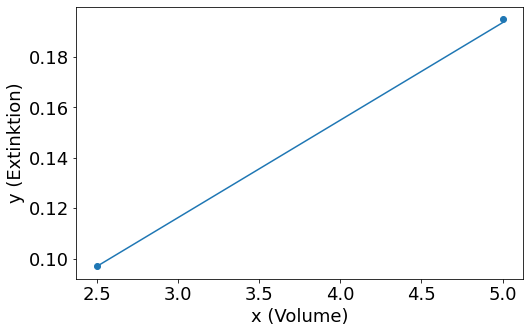

Slope a nan, intercept b nan, Pearsons correlation coefficient r 0.000000;


/home/cheng/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/home/cheng/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/cheng/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


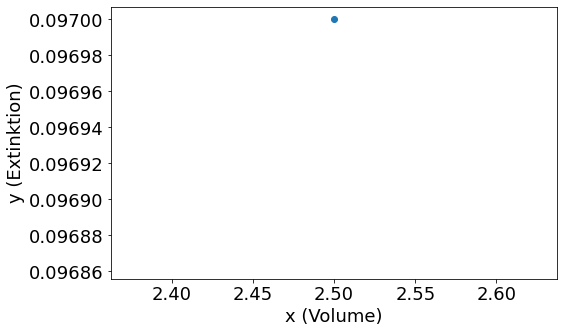

In [56]:
get_r(vol, ext)